# Solución Tarea Miniproyecto: *Representation Learning*

### EL7024 - Teoría de la Información: Fundamentos y Aplicaciones 
### Information and Decision Systems Group

Nombre: Mario Vicuña Álvarez

## Preguntas Teóricas:

### P1) Inferencia Variacional

#### P1a)

A partir del funcional objetivo de Inferencia Variacional $KL(q(\mathbf{Z})||p(\mathbf{Z}|x))$ encuentre una cota inferior para el logaritmo de la **evidencia** $\log{p(x)}$ y muestre que esta se puede escribir como:

\begin{equation}
  \begin{split}
    ELBO(q) &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{p(x,\mathbf{Z})}\} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{q(\mathbf{Z})}\} \\
&= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{p(x|\mathbf{Z})}\} - KL(q(\mathbf{Z})||p(\mathbf{Z}))
  \end{split}
\end{equation}

##### Respuesta:

Podemos partir por aplicar la definición de divergencia al funcional objetivo y elaborar desde ahí:

\begin{equation}
  \begin{split}
    KL(q(\mathbf{Z})||p(\mathbf{Z}|x)) &= \int_{\mathcal{Z}} q(\mathbf{z}) \log{\left( \frac{q(\mathbf{z})}{p(\mathbf{z}|x)} \right)} d\mathbf{z} \\
    &= \int_{\mathcal{Z}} q(\mathbf{z}) \log{\left( \frac{q(\mathbf{z}) p(x)}{p(x,\mathbf{z})} \right)} d\mathbf{z} \\
    &= \int_{\mathcal{Z}} q(\mathbf{z}) \log{q(\mathbf{z})} d\mathbf{z} + \int_{\mathcal{Z}} q(\mathbf{z}) \log{p(x)} d\mathbf{z} - \int_{\mathcal{Z}} q(\mathbf{z}) \log{p(x,\mathbf{z})} d\mathbf{z} \\
    &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{q(\mathbf{Z})} \right\} + \log{p(x)} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ p(x,\mathbf{z}) \right\}\\
  \end{split}
\end{equation}

Por propiedad de la divergencia tenemos entonces que

\begin{equation}
  \begin{split}
    &KL(q(\mathbf{Z})||p(\mathbf{Z}|x)) \geq 0 \\
    ⇒& \log{p(x)} \geq \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ p(x,\mathbf{z}) \right\} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{q(\mathbf{Z})} \right\} \equiv ELBO(q)
  \end{split}
\end{equation}

A su vez:

\begin{equation}
  \begin{split}
    ELBO(q) &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ p(x,\mathbf{Z}) \right\} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{q(\mathbf{Z})} \right\} \\
    &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{\left( p(x|\mathbf{Z})p(\mathbf{Z}) \right)} \right\} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{q(\mathbf{Z})} \right\} \\
    &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{p(x|\mathbf{Z})} \right\} + \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{p(\mathbf{Z})} \right\} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{q(\mathbf{Z})} \right\} \\
    &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{p(x|\mathbf{Z})} \right\} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{\left( \frac{q(\mathbf{Z})}{p(\mathbf{Z})} \right)} \right\} \\
    &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{p(x|\mathbf{Z})} \right\} - KL(q(\mathbf{Z}) || p(\mathbf{Z}))
  \end{split}
\end{equation}

#### P1b)

Explique e interprete la forma de la *Evidence Lower Bound*. En este sentido puede resultarle más fácil considerar la segunda expresión $ELBO(q) = \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})}\{\log{p(x|\mathbf{Z})}\} - KL(q(\mathbf{Z})||p(\mathbf{Z}))$.

**Hint**: Puede resultarle útil pensar en lo siguiente: ¿Para qué valores de $\mathbf{z}$ o bajo qué criterio cada término de este funcional propicia la asignación de masa en $q(\mathbf{z})$?

##### Respuesta

Para el primer término, notamos que $\log{p(x|\mathbf{Z})}$ corresponde al logaritmo de la función de verosimilitud de $x$. Por lo tanto, al maximizar la ELBO se propician distribuciones tales que se asigne una mayor masa a regiones de $\mathcal{Z}$ donde las representaciones latentes sean capaces de explicar los valores de los datos $x$, es decir que sean verosímiles y con capacidad predictiva.

Por otro lado, el término de divergencia actúa como un regularizador, penalizando distribuciones $q(\mathbf{z})$ que, aunque expliquen de mejor manera los valores de $x$, se alejen mucho de la marginal "verdadera" $p(\mathbf{z})$.

Así, el problema de maximizar la ELBO se convierte en uno de Máxima Verosimilitud penalizado según la "distancia" entre la marginal variacional y la real.

#### P1c)

Explique brevemente por qué los problemas de optimización $\underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg min}} KL(q(\mathbf{Z})||p(\mathbf{Z}|x))$ y $\underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg max}} ELBO(q)$ son equivalentes.

##### Respuesta

Retomando la expansión de la divergencia de la primera parte:

\begin{equation}
  \begin{split}
    KL(q(\mathbf{Z})||p(\mathbf{Z}|x)) &= \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ \log{q(\mathbf{Z})} \right\} + \log{p(x)} - \mathbb{E}_{\mathbf{Z} \sim q(\mathbf{z})} \left\{ p(x,\mathbf{z}) \right\} \\
    &= \log{p(x)} - ELBO(q)
  \end{split}
\end{equation}

Luego, es evidente que

\begin{equation}
  \begin{split}
    \underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg min}} KL(q(\mathbf{Z})||p(\mathbf{Z}|x)) &= \underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg min}} \left[ \log{p(x)} - ELBO(q) \right] \\
    &= \underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg min}} - ELBO(q) \\
    &= \underset{q(\mathbf{z}) \in \mathcal{Q}}{\operatorname{arg max}} ELBO(q)
  \end{split}
\end{equation}

### P2) *Information Bottleneck* Profundo

En el mismo estilo que estudiamos para los *Autoencoders* Variacionales deduciremos la forma de definir una función de pérdida adecuada para abordar el problema del *Information Bottleneck* por medio de redes neuronales. Para esto, primero reescribimos el problema de la siguiente manera:

\begin{equation}
    \underset{p(\mathbf{z}|\mathbf{x}), p(\mathbf{y}|\mathbf{z})}{\operatorname{max}} R_{IB} = I(\mathbf{Y};\mathbf{Z}) - \beta I(\mathbf{X};\mathbf{Z})
\end{equation}

de modo tal que deduciremos una cota inferior del funcional, siendo $\mathbf{Z}$ la variable latente que comprime la señal de entrada $\mathbf{X}$ y se utiliza en la predicción de $\mathbf{Y}$, y es tal que $\mathbf{Z} - \mathbf{X} - \mathbf{Y}$.

#### P2a)

Consideremos primero una cota inferior para $I(\mathbf{Y};\mathbf{Z})$. Considerando que $q(\mathbf{y}|\mathbf{z})$ es una aproximación variacional del *decoder* $p(\mathbf{y}|\mathbf{z})$ y el supuesto de Markovianidad demuestre que:

\begin{equation}
    I(\mathbf{Y};\mathbf{Z}) \geq \int_{\mathcal{X}}\int_{\mathcal{Z}}\int_{\mathcal{Y}}p(z|x)p(y|x)p(x)\log q(y|z) dydzdx \equiv \tilde{I}(\mathbf{Y};\mathbf{Z})
\end{equation}

##### Respuesta

\begin{equation}
  \begin{split}
    I(\mathbf{Y};\mathbf{Z}) &= \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{\left( \frac{p(y,z)}{p(y)p(z)} \right)} dydz \\
    &= \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{\left( \frac{p(y|z)}{p(y)} \right)} dydz \\
    &= \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{ p(y|z)} dydz - \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{p(y)} dydz \\
    &= \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{p(y|z)} dydz + H(\mathbf{Y})
  \end{split}
\end{equation}

Considerando la aproximación variacional $q(\mathbf{y}|\mathbf{z})$, notamos que

\begin{equation}
  \begin{split}
    0 &\leq KL(p(\mathbf{Y}|\mathbf{Z}) || q(\mathbf{Y}|\mathbf{Z})) \\
    &= \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{\left( \frac{p(y|z)}{q(y|z)} \right)} dydz \\
    &= \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{p(y|z)} dydz - \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{q(y|z)} dydz
  \end{split}
\end{equation}

Por lo que

\begin{equation}
  \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{q(y|z)} dydz \leq \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{p(y|z)} dydz
\end{equation}

\begin{equation}
  \begin{split}
    ⇒ I(\mathbf{Y};\mathbf{Z}) &\geq \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{q(y|z)} dydz + H(\mathbf{Y}) \\
    &\geq \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z) \log{q(y|z)} dydz \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(x,y,z) \log{q(y|z)} dydzdx \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z|x)p(x) \log{q(y|z)} dydzdx
  \end{split}
\end{equation}

Finalmente, por la condición de Markovianidad:

\begin{equation}
  I(\mathbf{Y};\mathbf{Z}) \geq \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(z|x)p(y|x)p(x) \log{q(y|z)} dydzdx \equiv \tilde{I}(\mathbf{Y};\mathbf{Z})
\end{equation}

#### P2b)

Para el término $I(\mathbf{X};\mathbf{Z})$ es necesaria una cota superior. Demuestre que una aproximación variacional $r(\mathbf{z})$ del *prior* $p(\mathbf{z})$ satisface que:

\begin{equation}
    I(\mathbf{X};\mathbf{Z}) \leq \int_{\mathcal{X}}\int_{\mathcal{Z}}\int_{\mathcal{Y}}p(z|x)p(y|x)p(x)\log{\left( \frac{p(z|x)}{r(z)} \right)} dydzdx \equiv \tilde{I}(\mathbf{X};\mathbf{Z})
\end{equation}

##### Respuesta

\begin{equation}
  \begin{split}
    I(\mathbf{X};\mathbf{Z})) &= \int_{\mathcal{X}} \int_{\mathcal{Z}} p(x,z) \log{\left( \frac{p(x,z)}{p(x)p(z)} \right)} dzdx \\ 
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} p(x,z) \log{\left( \frac{p(z|x)}{p(z)} \right)} dzdx \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} p(x,z) \log{p(z|x)} dzdx - \int_{\mathcal{X}} \int_{\mathcal{Z}} p(x,z) \log{p(z)} dzdx \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} p(x,z) \log{p(z|x)} dzdx - \int_{\mathcal{Z}} p(z) \log{p(z)} dz
  \end{split}
\end{equation}

Notemos que, para la aproximación variacional $r(\mathbf{z})$, se satisface que

\begin{equation}
  \begin{split}
    0 &\leq KL(p(\mathbf{Z}) || r(\mathbf{Z})) \\
    &= \int_{\mathcal{Z}} p(z) \log{\left( \frac{p(z)}{r(z)} \right)} dz \\
    &= \int_{\mathcal{Z}} p(z) \log{p(z)} dz - \int_{\mathcal{Z}} p(z) \log{r(z)} dz
  \end{split}
\end{equation}

Por lo que

\begin{equation}
  \int_{\mathcal{Z}} p(z) \log{r(z)} dz \leq \int_{\mathcal{Z}} p(z) \log{p(z)} dz
\end{equation}

\begin{equation}
  \begin{split}
    ⇒I(\mathbf{X};\mathbf{Z})) &\leq \int_{\mathcal{X}} \int_{\mathcal{Z}} p(x,z) \log{p(z|x)} dzdx - \int_{\mathcal{Z}} p(z) \log{r(z)} dz \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} p(x,z) \log{p(z|x)} dzdx - \int_{\mathcal{X}} \int_{\mathcal{Z}} p(x,z) \log{r(z)} dzdx \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} p(x,z) \log{\left( \frac{p(z|x)}{r(z)} \right)} dzdx \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(x,y,z) \log{\left( \frac{p(z|x)}{r(z)} \right)} dydzdx \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(y,z|x)p(x) \log{\left( \frac{p(z|x)}{r(z)} \right)} dydzdx
  \end{split}
\end{equation}

Finalmente, por la condición de Markovianidad:

\begin{equation}
  I(\mathbf{X};\mathbf{Z})) \leq \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_{\mathcal{Y}} p(z|x)p(y|x)p(x) \log{\left( \frac{p(z|x)}{r(z)} \right)} dydzdx ≡ \tilde{I}(\mathbf{X};\mathbf{Z}))
\end{equation}

#### P2c)

Definamos la cota resultante para $R_{IB}$ por

\begin{equation}
    \mathcal{L}_{IB} = \tilde{I}(\mathbf{Y};\mathbf{Z}) - \beta \tilde{I}(\mathbf{X};\mathbf{Z})
\end{equation}

Empleando la distribución conjunta empírica $\tilde{p}(x,y) = \frac{1}{N}\sum_{i=1}^{N}\delta_{x^{(i)}}(x)\delta_{y^{(i)}}(y)$ deduzca que

\begin{equation}
    \mathcal{L}_{IB} \approx \frac{1}{N}\sum_{i=1}^{N}\left[ \mathbb{E}_{\mathbf{Z} \sim p(\mathbf{z}|x^{i})} \left\{ \log q(y^{(i)}|\mathbf{Z}) \right\} - \beta KL\left( p(\mathbf{Z}|x^{(i)}) || r(\mathbf{Z}) \right)\right]
\end{equation}

##### Respuesta

\begin{equation}
  \begin{split}
    \mathcal{L}_{IB} &= \tilde{I}(\mathbf{Y};\mathbf{Z}) - \beta \tilde{I}(\mathbf{X};\mathbf{Z}) \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_\mathcal{Y} p(z|x)p(y|x)p(x) \left[ \log{q(y|z)} - \beta \log{\left( \frac{p(z|x)}{r(z)} \right)} \right] dydzdx \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_\mathcal{Y} p(z|x)p(x,y) \left[ \log{q(y|z)} - \beta \log{\left( \frac{p(z|x)}{r(z)} \right)} \right] dydzdx \\
    &≈ \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_\mathcal{Y} p(z|x)\tilde{p}(x,y) \left[ \log{q(y|z)} - \beta \log{\left( \frac{p(z|x)}{r(z)} \right)} \right] dydzdx \\
    &= \int_{\mathcal{X}} \int_{\mathcal{Z}} \int_\mathcal{Y} p(z|x) \left( \frac{1}{N}\sum_{i=1}^{N}\delta_{x^{(i)}}(x)\delta_{y^{(i)}}(y) \right) \left[ \log{q(y|z)} - \beta \log{\left( \frac{p(z|x)}{r(z)} \right)} \right] dydzdx \\
    &= \frac{1}{N} \sum_{i=1}^{N} \int_{\mathcal{Z}} p(z|x^{(i)}) \left[ \log{q(y^{(i)}|z)} - \beta \log{\left( \frac{p(z|x^{(i)})}{r(z)} \right)} \right] dz \\
    &= \frac{1}{N} \sum_{i=1}^{N} \left[ \int_{\mathcal{Z}} p(z|x^{(i)}) \log{q(y^{(i)}|z)}dz - \beta \int_{\mathcal{Z}} p(z|x^{(i)}) \log{\left( \frac{p(z|x^{(i)})}{r(z)} \right)}dz \right] \\
    &= \frac{1}{N} \sum_{i=1}^{N} \left[ \mathbb{E}_{\mathbf{Z} \sim p(\mathbf{z}|x^{(i)})} \left\{ \log{q(y^{(i)}|\mathbf{Z})} \right\} - \beta KL\left( p(\mathbf{Z}|x^{(i)}) || r(\mathbf{Z}) \right) \right]
  \end{split}
\end{equation}

## Preguntas de Simulación

En esta parte de la tarea deberán implementar y probar el modelo deducido en la pregunta 2 mediante redes neuronales, donde se considera que las aproximaciones variacionales están parametrizadas por una red correspondiente al *encoder* $p_{\theta}(\mathbf{z}|\mathbf{x})$ y otra para el *decoder* $q_{\phi}(\mathbf{y}|\mathbf{z})$, es decir que el funcional a **minimizar** corresponde a:

\begin{equation}
    \begin{split}
        \mathcal{L}'_{IB}(\phi, \theta) &= -\frac{1}{N}\sum_{i=1}^{N}\left[ \mathbb{E}_{\mathbf{Z} \sim p_{\theta}(\mathbf{z}|x^{(i)})} \left\{ \log q_{\phi}(y^{(i)}|\mathbf{Z}) \right\} - \beta KL\left( p_\theta(\mathbf{Z}|x^{(i)}) || r(\mathbf{Z}) \right)\right] \\
        &= \frac{1}{N}\sum_{i=1}^{N}\left[ \mathbb{E}_{\mathbf{Z} \sim p_{\theta}(\mathbf{z}|x^{(i)})} \left\{ -\log q_{\phi}(y^{(i)}|\mathbf{Z}) \right\} + \beta KL\left( p_\theta(\mathbf{Z}|x^{(i)}) || r(\mathbf{Z}) \right)\right]
    \end{split}
\end{equation}

Los experimentos se realizarán sobre el *dataset* MNIST en el problema de **clasificación**.

### Preliminares

In [1]:
# %tensorflow_version 1.x
# %load_ext tensorboard

%matplotlib inline
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D
import matplotlib.transforms as plttransforms
import numpy as np

import torch
import torch.distributions as D
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from copy import deepcopy
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from torch.utils.data import Dataset, DataLoader, Subset

print('Pytorch version:', torch.__version__)

use_gpu = True
device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")
print('Device:', device)

Pytorch version: 1.7.1
Device: cuda:0


In [5]:
class RangeNormalize:
    '''Normalize input to a given range [a,b]'''
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, input):
        min = input.amin(dim=(1,2))
        max = input.amax(dim=(1,2))

        m = self.b - self.a
        
        return (self.a + m * (input.T - min) / (max - min)).T

In [6]:
#  Batch Sizes
train_batch_size = 100
val_batch_size = 1000

# Train-Val Split
transformations = transforms.Compose([transforms.ToTensor(),
                                      RangeNormalize(-1, 1)])

train_dataset_mnist = datasets.MNIST(root='./', train=True, download=True,
                                     transform=transformations)

val_dataset_mnist = datasets.MNIST(root='./', train=False, 
                                   transform=transformations)


# DataLoaders
train_loader_mnist = torch.utils.data.DataLoader(train_dataset_mnist,
                                           batch_size = train_batch_size)
val_loader_mnist = torch.utils.data.DataLoader(val_dataset_mnist,
                                          batch_size = val_batch_size)

Label : 1


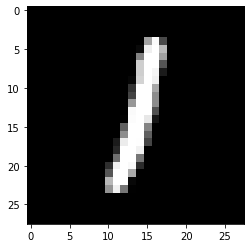

Max value: 1.0, Min value: -1.0


In [7]:
loader = val_loader_mnist
index = np.random.randint(len(loader.dataset))
img = loader.dataset[index][0].numpy()[0]
print('Label : {}'.format(loader.dataset[index][1]))
plt.figure()
plt.imshow(img,cmap=cm.gray)
plt.show()
print('Max value: {}, Min value: {}'.format(np.amax(img), np.amin(img)))

### i)

Implemente una clase $\texttt{DeepIB}$ que corresponda a la siguiente arquitectura:

* *Encoder* Gaussiano: Red *fully-connected* $784\to1024\to1024\to2K$, donde K es la dimensionalidad de la variable latente. Los primeros $K$ valores de dicha capa corresponderán a $\mu_{\mathbf{z}}(\mathbf{x})$ y las siguientes $K$ componentes comprenden las desviaciones estándar $\sigma_{\mathbf{z}}(\mathbf{x})$ (notar entonces que estamos hablando de una matriz de covarianza diagonal). Entre cada capa debe usar la función de activación $\texttt{ReLU}$.
**Hint**: Para asegurar que las desviaciones estándar $\sigma_{\mathbf{z}}(\mathbf{x})$ sean positivas se recomienda aplicarles la siguiente transformación: 

\begin{equation}
    \sigma_{\mathbf{z}}(\mathbf{x}) = \log (1 + \exp (\sigma_{\mathbf{z}}^{raw}(\mathbf{x}) - 5.0)),
\end{equation}

$\hspace{7mm}$ donde $\sigma_{\mathbf{z}}^{raw}(\mathbf{x})$ denota a la desviación estándar antes de aplicar esta transformación.

* *Decoder*: Red *fully-connected* $K\to10$.

Para la Función de Costo considere $r(\mathbf{z}) = \mathcal{N}(\mathbf{z};0,I)$ (es decir que requiere una expresión cerrada para el término de divergencia).

**Hint**: Dado que el *decoder* aborda el problema de clasificación, puede usar la función de *Cross-Entropy* o similar para el primer término, en forma astuta.

##### Respuesta

Partimos implementando el *encoder* Gaussiano y el *decoder* por separado y los juntamos en la clase pedida:

In [8]:
class Encoder(nn.Module):
    def __init__(self, K):
        super(Encoder, self).__init__()
        self.fc = nn.Sequential()

        layer_dims = [784, 1024, 1024, 2 * K]
        for i in range(len(layer_dims)-1):
            self.fc.add_module(f'Linear{i}', nn.Linear(layer_dims[i], layer_dims[i+1]))
            if not i == len(layer_dims) - 2:
                self.fc.add_module(f'Act{i}', nn.ReLU())

    def forward(self, x):
        K = int(self.fc[-1].weight.shape[0] / 2)
        
        encoding = self.fc(x)
        mu = encoding[:,:K]
        std_raw = encoding[:,K:]
        std = (1 + (std_raw - 5.0).exp()).log()

        return mu, std



class Decoder(nn.Module):
    def __init__(self, K):
        super(Decoder, self).__init__()
        self.fc = nn.Sequential(nn.Linear(K, 10),
                                nn.LogSoftmax(dim=-1))
    
    def forward(self, x):
        return self.fc(x)



class DeepIB(nn.Module):
    def __init__(self, K):
        super(DeepIB, self).__init__()
        self.encoder = Encoder(K)
        self.decoder = Decoder(K)

    def forward(self, x, L=1):
        mu, std = self.encoder(x)
        z_samples = self.sample_z(mu, std, L)
        return mu, std, self.decoder(z_samples)

    def sample_z(self, mu, std, L):
        mu = mu.unsqueeze(1)
        std = std.unsqueeze(1)
        if self.training:
            mu = mu.repeat(1,L,1)
            std = std.repeat(1,L,1)
        epsilon = torch.randn_like(std)
        
        return mu + std * epsilon

Dadas las restricciones de diseño sobre el *encoder* $p_{\theta}(\mathbf{z}|\mathbf{x})$ y el prior $r(\mathbf{z})$, podemos recurrir al diseño visto en clases, es decir que el término de divergencia del funcional objetivo se puede calcular en forma cerrada como

\begin{equation}
  KL\left(p_{\theta}(\mathbf{z}|\mathbf{x}^{(i)})||p_{\theta}(\mathbf{z})\right) = -\frac{1}{2}\sum_{k=1}^{K}1+\log \sigma_{z_{k}}^{2}(x^{(i)}) - \mu_{z_{k}}^{2}(x^{(i)}) - \sigma_{z_{k}}^{2}(x^{(i)})
\end{equation}

Luego, definimos el funcional objetivo como sigue:

In [9]:
def DVIBLoss(y, mu, std, y_pred, beta):
    ## CE computation
    y = y.view(-1,1) * torch.ones(y_pred.shape[:-1], dtype=torch.long).to(y.device)
    CE_i = nn.NLLLoss(reduction='none')(y_pred.transpose(2,1), y).mean(dim=-1)

    ## KLD computation
    KL_i = (-0.5 * (1 + std.pow(2).log() - mu.pow(2) - std.pow(2))).sum(dim=-1)

    CE = CE_i.mean()
    KL = KL_i.mean()

    loss = CE + beta * KL

    return loss

### ii)

Implemente una clase $\texttt{MLP}$ correspondiente a la arquitectura $784\to1024\to1024\to K\to10$ para un mismo valor de $K$ que en el caso de $\texttt{DeepIB}$.

##### Respuesta

Recurrimos a un esquema similar al utilizado para el encoder, agregando una capa extra que retorna las probabilidades:

In [10]:
class MLP(nn.Module):
    def __init__(self, K):
        super(MLP, self).__init__()
        self.fc = nn.Sequential()

        layer_dims = [784, 1024, 1024, K, 10]
        for i in range(len(layer_dims)-1):
            self.fc.add_module(f'Linear{i}', nn.Linear(layer_dims[i], layer_dims[i+1]))
            if not i == len(layer_dims) - 2:
                self.fc.add_module(f'Act{i}', nn.ReLU())
            else:
                self.fc.add_module('LogProbs', nn.LogSoftmax(dim=1))

    def forward(self, x):
        return self.fc(x)

### iii)

Para $K=2$ y $\beta \in \{10^{-3}, 10^{-1},1\}$, entrene ambos modelos considerando un *loop* de entrenamiento tal que el *learning rate* del optimizador Adam decaiga al $97\%$ de su valor cada $2$ épocas (ver [$\texttt{torch.optim.lr_scheduler}$](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)):

$\texttt{lr0 = 1e-4}$

$\texttt{adam_beta1 = 0.5}$

$\texttt{adam_beta2 = 0.999}$

$\texttt{lr_decay = 0.97}$

$\texttt{decay_rate = 2}$

$\texttt{nEpochs = 200}$

Como parámetro $L$ de muestreo para aplicar el *Reparametrization Trick* puede utilizar $L=12$. Si usa la función de Pytorch [$\texttt{torch.nn.CrossEntropyLoss}$](https://pytorch.org/docs/master/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) o similar, se recomienda revisar la documentación, en particular el caso multidimensional y el efecto del parámetro $\texttt{reduction}$ para una correcta implementación del funcional objetivo.

Compare y analice la *accuracy* obtenida por los modelos estocásticos obtenidos entre sí y con el modelo $\texttt{MLP}$ clásico, así como también la función de pérdida de cada uno.

Además, para los modelos estocásticos, obtenga la proyección de los datos de prueba en el espacio latente $K$-dimensional y analice el efecto de $\beta$ en este resultado.

##### Respuesta

Definamos los parámetros para nuestros modelos y una función para la *accuracy*:

In [11]:
betas = [1e-3, 0.1, 1]
K = 2
L = 12

lr0 = 1e-4
adam_beta1 = 0.5
adam_beta2 = 0.999
lr_decay = 0.97
decay_rate = 2
nEpochs = 200

report_rate = 25

In [12]:
def correct_hits(y_pred,  target):
    pred = np.argmax(y_pred, axis=-1)
    return np.sum(np.equal(pred, target))

Entrenamos la MLP:

In [50]:
baselineMLP = MLP(K).to(device)

optimizer = torch.optim.Adam(baselineMLP.parameters(), lr0, (adam_beta1, adam_beta2))

lmbda = lambda epoch: lr_decay
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)

criterion = nn.NLLLoss()

In [51]:
MLP_loss_train = []
MLP_loss_eval = []
MLP_acc_train = []
MLP_acc_eval = []
for epoch in np.arange(nEpochs):

    ## Train
    baselineMLP.train()
    loader = train_loader_mnist
    for X, y in loader:
        ## Data preparation
        X = X.reshape(-1, 784).to(device)
        y = y.to(device)

        ## Prediction
        y_pred = baselineMLP(X)

        ## Loss
        loss = criterion(y_pred, y)

        ## Train step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



    ## Performance measurement
    baselineMLP.eval()
    with torch.no_grad():
        ## Train set
        loader = train_loader_mnist
        temp_loss = 0
        temp_acc = 0
        for X, y in loader:
            ## Data preparation
            X = X.reshape(-1, 784).to(device)
            y = y.to(device)

            ## Prediction
            y_pred = baselineMLP(X)

            ## Loss
            loss = criterion(y_pred, y)
            temp_loss += loss.item() / len(loader)

            ## Accuracy
            hits = correct_hits(y_pred.exp().clone().detach().cpu().numpy(),
                                y.clone().detach().cpu().numpy())
            temp_acc += hits / len(loader.dataset)

        MLP_loss_train.append(temp_loss)
        MLP_acc_train.append(temp_acc)

        ## Test set
        loader = val_loader_mnist
        temp_loss = 0
        temp_acc = 0
        for X, y in loader:
            ## Data preparation
            X = X.reshape(-1, 784).to(device)
            y = y.to(device)

            ## Prediction
            y_pred = baselineMLP(X)

            ## Loss
            loss = criterion(y_pred, y)
            temp_loss += loss.item() / len(loader)

            ## Accuracy
            hits = correct_hits(y_pred.exp().clone().detach().cpu().numpy(),
                                y.clone().detach().cpu().numpy())
            temp_acc += hits / len(loader.dataset)

        MLP_loss_eval.append(temp_loss)
        MLP_acc_eval.append(temp_acc)

        if (epoch + 1) % report_rate == 0:
            print('Epoch {:3d} || Train Loss : {:5.3f} || Val Loss : {:5.3f}'.format(epoch+1,MLP_loss_train[-1],MLP_loss_eval[-1]))
            print('          || Train Accu : {:5.3f} || Val Accu : {:5.3f}'.format(MLP_acc_train[-1], MLP_acc_eval[-1]))



    ## Scheduler
    if (epoch + 1) % decay_rate == 0:
        scheduler.step()

Epoch  25 || Train Loss : 0.812 || Val Loss : 0.931
          || Train Accu : 0.685 || Val Accu : 0.673
Epoch  50 || Train Loss : 0.375 || Val Loss : 0.659
          || Train Accu : 0.888 || Val Accu : 0.869
Epoch  75 || Train Loss : 0.258 || Val Loss : 0.688
          || Train Accu : 0.894 || Val Accu : 0.869
Epoch 100 || Train Loss : 0.203 || Val Loss : 0.809
          || Train Accu : 0.898 || Val Accu : 0.866
Epoch 125 || Train Loss : 0.187 || Val Loss : 0.939
          || Train Accu : 0.899 || Val Accu : 0.866
Epoch 150 || Train Loss : 0.176 || Val Loss : 1.013
          || Train Accu : 0.902 || Val Accu : 0.868
Epoch 175 || Train Loss : 0.172 || Val Loss : 1.152
          || Train Accu : 0.902 || Val Accu : 0.868
Epoch 200 || Train Loss : 0.168 || Val Loss : 1.238
          || Train Accu : 0.904 || Val Accu : 0.867


Y ahora entrenamos los modelos DeepIB

In [15]:
DVIBResults = {}
for beta in betas:
    print(f'\n Beta = {beta}\n')
    ## Settings
    DVIBModel = DeepIB(K).to(device)

    optimizer = torch.optim.Adam(DVIBModel.parameters(), lr0, (adam_beta1, adam_beta2))

    lmbda = lambda epoch: lr_decay
    scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)

    criterion = DVIBLoss



    DVIB_CE_train = []
    DVIB_CE_eval = []
    DVIB_KL_train = []
    DVIB_KL_eval = []
    DVIB_loss_train = []
    DVIB_loss_eval = []
    DVIB_acc_train = []
    DVIB_acc_eval = []
    for epoch in np.arange(nEpochs):

        ## Train
        DVIBModel.train()
        loader = train_loader_mnist
        for X, y in loader:
            ## Data preparation
            X = X.reshape(-1, 784).to(device)
            y = y.to(device)

            ## Prediction
            mu, std, y_pred = DVIBModel(X, L)

            ## Loss
            loss = criterion(y, mu, std, y_pred, beta)

            ## Train step
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()



        ## Performance measurement
        DVIBModel.eval()
        with torch.no_grad():
            ## Train set
            loader = train_loader_mnist
            temp_ce = 0
            temp_kl = 0
            temp_loss = 0
            temp_acc = 0
            for X, y in loader:
                ## Data preparation
                X = X.reshape(-1, 784).to(device)
                y = y.to(device)

                ## Prediction
                mu, std, y_pred = DVIBModel(X, L)

                ## Loss
                y_ = y.view(-1,1) * torch.ones(y_pred.shape[:-1], dtype=torch.long).to(device)
                CE_i = nn.NLLLoss(reduction='none')(y_pred.transpose(2,1), y_).mean(dim=-1)
                KL_i = (-0.5 * (1 + std.pow(2).log() - mu.pow(2) - std.pow(2))).sum(dim=-1)

                CE = CE_i.mean().item()
                KL = KL_i.mean().item()
                loss = CE + beta * KL

                temp_ce += CE / len(loader)
                temp_kl += KL / len(loader)
                temp_loss += loss / len(loader)

                ## Accuracy
                hits = correct_hits(y_pred.exp().clone().detach().cpu().numpy(),
                                    y.view(-1,1).clone().detach().cpu().numpy())
                temp_acc += hits / len(loader.dataset)

            DVIB_CE_train.append(temp_ce)
            DVIB_KL_train.append(temp_kl)
            DVIB_loss_train.append(temp_loss)
            DVIB_acc_train.append(temp_acc)

            ## Test set
            loader = val_loader_mnist
            temp_ce = 0
            temp_kl = 0
            temp_loss = 0
            temp_acc = 0
            for X, y in loader:
                ## Data preparation
                X = X.reshape(-1, 784).to(device)
                y = y.to(device)

                ## Prediction
                mu, std, y_pred = DVIBModel(X, L)

                ## Loss
                y_ = y.view(-1,1) * torch.ones(y_pred.shape[:-1], dtype=torch.long).to(device)
                CE_i = nn.NLLLoss(reduction='none')(y_pred.transpose(2,1), y_).mean(dim=-1)
                KL_i = (-0.5 * (1 + std.pow(2).log() - mu.pow(2) - std.pow(2))).sum(dim=-1)

                CE = CE_i.mean().item()
                KL = KL_i.mean().item()
                loss = CE + beta * KL

                temp_ce += CE / len(loader)
                temp_kl += KL / len(loader)
                temp_loss += loss / len(loader)

                ## Accuracy
                hits = correct_hits(y_pred.exp().clone().detach().cpu().numpy(),
                                    y.view(-1,1).clone().detach().cpu().numpy())
                temp_acc += hits / len(loader.dataset)

            DVIB_CE_eval.append(temp_ce)
            DVIB_KL_eval.append(temp_kl)
            DVIB_loss_eval.append(temp_loss)
            DVIB_acc_eval.append(temp_acc)

            if (epoch + 1) % report_rate == 0:
                print('Epoch {:3d} || Train Loss : {:5.3f} || Val Loss : {:5.3f}'.format(epoch+1,DVIB_loss_train[-1],DVIB_loss_eval[-1]))
                print('          || Train Accu : {:5.3f} || Val Accu : {:5.3f}'.format(DVIB_acc_train[-1], DVIB_acc_eval[-1]))



        ## Scheduler
        if (epoch + 1) % decay_rate == 0:
            scheduler.step()

    DVIBResults[beta] = {'model' : DVIBModel,
                         'DVIB_CE_train' : DVIB_CE_train,
                         'DVIB_CE_eval' : DVIB_CE_eval,
                         'DVIB_KL_train' : DVIB_KL_train,
                         'DVIB_KL_eval' : DVIB_KL_eval,
                         'DVIB_loss_train' : DVIB_loss_train,
                         'DVIB_loss_eval' : DVIB_loss_eval,
                         'DVIB_acc_train' : DVIB_acc_train,
                         'DVIB_acc_eval' : DVIB_acc_eval}


 Beta = 0.001

Epoch  25 || Train Loss : 0.246 || Val Loss : 0.361
          || Train Accu : 0.994 || Val Accu : 0.965
Epoch  50 || Train Loss : 0.147 || Val Loss : 0.294
          || Train Accu : 1.000 || Val Accu : 0.969
Epoch  75 || Train Loss : 0.110 || Val Loss : 0.262
          || Train Accu : 1.000 || Val Accu : 0.969
Epoch 100 || Train Loss : 0.091 || Val Loss : 0.248
          || Train Accu : 1.000 || Val Accu : 0.971
Epoch 125 || Train Loss : 0.080 || Val Loss : 0.242
          || Train Accu : 1.000 || Val Accu : 0.970
Epoch 150 || Train Loss : 0.073 || Val Loss : 0.237
          || Train Accu : 1.000 || Val Accu : 0.971
Epoch 175 || Train Loss : 0.069 || Val Loss : 0.235
          || Train Accu : 1.000 || Val Accu : 0.971
Epoch 200 || Train Loss : 0.066 || Val Loss : 0.231
          || Train Accu : 1.000 || Val Accu : 0.970

 Beta = 0.1

Epoch  25 || Train Loss : 1.181 || Val Loss : 1.223
          || Train Accu : 0.852 || Val Accu : 0.831
Epoch  50 || Train Loss : 0.935 ||

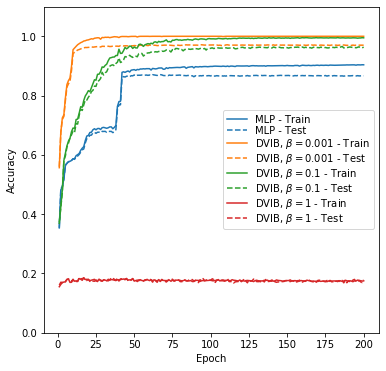

In [92]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

epochs = np.arange(nEpochs) + 1

ax.plot(epochs, MLP_acc_train, label='MLP - Train', c='C0', ls='-')
ax.plot(epochs, MLP_acc_eval, label='MLP - Test', c='C0', ls='--')

for i in range(len(betas)):
    beta = betas[i]
    ax.plot(epochs, DVIBResults[beta]['DVIB_acc_train'], 
            label=r'DVIB, $\beta={}$ - Train'.format(beta), c=f'C{i+1}', ls='-')
    ax.plot(epochs, DVIBResults[beta]['DVIB_acc_eval'], 
            label=r'DVIB, $\beta={}$ - Test'.format(beta), c=f'C{i+1}', ls='--')

ax.set_ylim(0,1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(labelspacing=0.1)
plt.show()

Primero notamos que tanto para los modelos DVIB con $\beta \in \{0.001, 0.1\}$ como la red MLP el *gap* de desempeño en términos de precisión es muy similar, mencionando además que los dos modelos estocásticos alcanzan un desempeño parecido, el cual varía suavemente a lo largo del entrenamiento. Por su lado, la red determinística ofrece una menor precisión y muestra una evolución escalonada, es decir que por momentos el algoritmo de gradiente descendente era incapaz de encontrar un "camino" a saguir en pos de mejorar el rendimiento.

En el caso del modelo DVIB más restringido ($\beta = 1$), vemos que no se ofrece evolución alguna en cuanto a precisión, demostrando que la red no aprendió nada durante el entrenamiento. Probablemente debido a que la restricción sobre la divergencia fue muy grande.

En base a los modelos que lograron aprender, se podría establecer que la restricción sobre el espacio latente ayuda a estos a encontrar representaciones que capturen la relación estadística entre la entrada y la salida de mejor manera, de ahí la mejora general en desempeño, además de que acelerarlo al no quedarse estancados y progresar contínuamente en la tarea.

Como último comentario, de estas curvas pareciera que no hay un grado importante de overfitting, en el sentido de que la *accuracy* sobre los datos de prueba se mantiene estable en relación a los de entrenamiento, sin empezar a deteriorarse estrepitosamente en algúin punto.

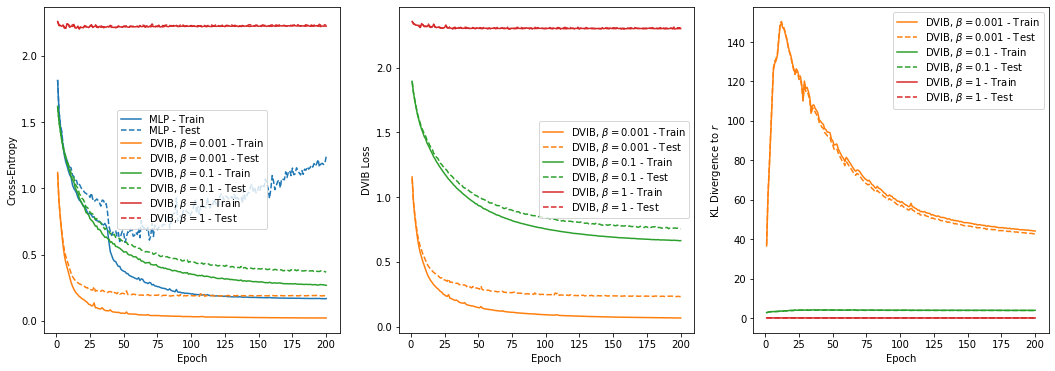

In [56]:
fig = plt.figure(figsize=(18,6))
epochs = np.arange(nEpochs) + 1



ax = fig.add_subplot(131)

ax.plot(epochs, MLP_loss_train, label='MLP - Train', c='C0', ls='-')
ax.plot(epochs, MLP_loss_eval, label='MLP - Test', c='C0', ls='--')

for i in range(len(betas)):
    beta = betas[i]
    ax.plot(epochs, DVIBResults[beta]['DVIB_CE_train'], 
            label=r'DVIB, $\beta={}$ - Train'.format(beta), c=f'C{i+1}', ls='-')
    ax.plot(epochs, DVIBResults[beta]['DVIB_CE_eval'], 
            label=r'DVIB, $\beta={}$ - Test'.format(beta), c=f'C{i+1}', ls='--')

ax.set_xlabel('Epoch')
ax.set_ylabel('Cross-Entropy')
ax.legend(labelspacing=0.1)



ax = fig.add_subplot(132)
for i in range(len(betas)):
    beta = betas[i]
    ax.plot(epochs, DVIBResults[beta]['DVIB_loss_train'], 
            label=r'DVIB, $\beta={}$ - Train'.format(beta), c=f'C{i+1}', ls='-')
    ax.plot(epochs, DVIBResults[beta]['DVIB_loss_eval'], 
            label=r'DVIB, $\beta={}$ - Test'.format(beta), c=f'C{i+1}', ls='--')
    
ax.set_xlabel('Epoch')
ax.set_ylabel('DVIB Loss')
ax.legend(labelspacing=0.1)



ax = fig.add_subplot(133)
for i in range(len(betas)):
    beta = betas[i]
    ax.plot(epochs, DVIBResults[beta]['DVIB_KL_train'], 
            label=r'DVIB, $\beta={}$ - Train'.format(beta), c=f'C{i+1}', ls='-')
    ax.plot(epochs, DVIBResults[beta]['DVIB_KL_eval'], 
            label=r'DVIB, $\beta={}$ - Test'.format(beta), c=f'C{i+1}', ls='--')
    
ax.set_xlabel('Epoch')
ax.set_ylabel(r'KL Divergence to $r$')
ax.legend(labelspacing=0.1)

plt.show()

No obstante, si miramos las curvas solamente de Cross-Entropy (o de Cross-Entropy para la MLP y la pérdida total para los modelos DVIB) se aprecia un claro sobreajuste en la red determinística, mientras que las estocásticas muestran un comportamiento similar al visto en el gráfico anterior, pero descendente en vez de ascendente.

Notamos además que al ver el desempeño de esta manera se aprecian diferencias entre los modelos obtenidos para $\beta \in \{ 0.001, 0.1\}$, siendo el primero claramente superior, lo cual podríamos esperar que repercuta en las representaciones obtenidas ya que como vimos en precisión no hubo mayor diferencia. 

Por su parte el modelo entrenado con $\beta = 1$ ofrece (nuevamente) la peor evolución, incluso más que la MLP.

Si consideramos solamente la evolución de la divergencia se aprecia otra cosa interesante, lo cual podría servir para predecir en cierta medida el comportamento del modelo sobre el espacio latente: 

* Para $\beta = 0.001$ podemos identificar dos etapas. La primera donde la divergencia empeora considerablemente para luego ir mejorando de a poco. Todo esto sin afectar en demasía a la función de loss total. Por lo tanto, el modelo dió prioridad a mejorar la predictibilidad y precisión (por medio de la Cross-Entropy) y ya alcanzando el 100% se enfocó en ajustar sus representaciones al prior. Luego, esperaríamos que el espacio latente obtenido por este modelo sea bastante flexible respecto al prior.

* Para $\beta = 1$ vemos que no hubo evolución alguna. Más aún, el valor de la divergencia es prácticamente cero, por lo que se esperaría que al codificar los datos todos se vieran como una misma Gaussiana, lo cual explicaría además el mal desempeño.

* El modelo con $\beta = 0.01$ muestra algo similar a un punto medio. Se ve que empeora levemente durante las primeras épocas y luego se mantiene estable durante el resto del entrenamiento. De lo cual esperaríamos que sus representaciones latentes se alejaron levemente del prior Gaussiano, solo lo suficiente como para que se vea reflejado en una ganancia en términos de de predicción.

Cabe notar que en este caso particular (puede cambiar si se reinicia todo) el modelo con $\beta=0.1$ y la MLP evolucionan de manera muy similar al principio del entrenamiento, pero luego esta última empieza a mostrar claras señales de sobreajuste, mientras que la primera muestra mejoras consistentes sobre ambos conjuntos de datos, lo cual indica nuevamente las buenas capacidades regularizadoras de la arquitectura DVIB.

In [19]:
loader = val_loader_mnist
batch = next(iter(loader))

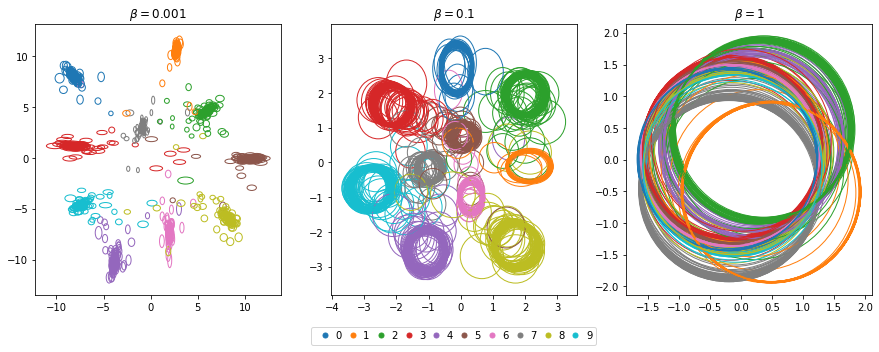

In [66]:
X = batch[0].reshape(-1, 784).to(device)
y = batch[1].cpu().numpy()

labels = np.unique(y)
markers = ['o'] * len(labels)

n_std = 3
fig = plt.figure(figsize=(15,5))
for i in range(len(betas)):
    ax = fig.add_subplot(100 + 10*len(betas) + i+1)
    model = DVIBResults[betas[i]]['model']
    with torch.no_grad():
        mus, stds = model.encoder(X)
        mus, stds = mus.cpu().numpy(), stds.cpu().numpy()

        for n in np.arange(len(y)):
            ellipse = Ellipse((0,0), width=1, height=1, 
                              facecolor='none', edgecolor=f'C{y[n]}')
            scale_x = stds[n,0] * n_std
            scale_y = stds[n,1] * n_std

            transf = plttransforms.Affine2D() \
                    .rotate_deg(45) \
                    .scale(scale_x, scale_y) \
                    .translate(mus[n,0], mus[n,1])

            ellipse.set_transform(transf + ax.transData)
            ax.add_patch(ellipse)



        ax.set_title(r'$\beta = {}$'.format(betas[i]))
        ax.autoscale()

    if i == 1:  
        custom_lines = [Line2D([0], [0], color=f'C{label}', 
                               marker='o', markersize=5, linestyle='None') for label in labels]
        ax.legend(custom_lines, labels, labelspacing=0.1, 
                  loc="lower center", bbox_to_anchor=(0.5,-0.2),
                  ncol=len(labels), columnspacing=0.1, handletextpad=0.05)
        
plt.show()

Al graficar las representaciones obtenidas para un batch de datos vemos que nuestras predicción fueron bastante acertadas. 

Para $\beta = 0.001$ se aprecia que los datos tienden a agruparse según su clase y en forma distribuida en torno al centro. Si bien cada clase/dato por sí solo difiere de lo que sería el prior $r=\mathcal{N}(0,I)$, el efecto de esta regularización podría estarse viendo reflejado en el mismo hecho de que los clusters se encuentran distribuidos de manera relativamente homogénea en torno a la moda el prior.

Para $\beta = 0.1$ ocurre algo similar, pero con una concentración de clusters mucho mayor. De hecho se encuentran todos dentro del "intervalo" de confianza del prior, el clásico $\pm 3\sigma$ de una distribución Gaussiana con una confidencia del $99.7\%$.

Finalmente, para $\beta = 1$ se tiene que cada cluster es prácticamente ídentico al otro, con una casi insignificante discrepancia respecto al prior (y entre ellos mismos).

Al graficar además las "regiones" de confianza de $\pm 3\sigma$ en cada eje, vemos además que posiblemente el prior y el parámetro $\beta$ también tuvieron un efecto. Se aprecia que en la medida que aumenta la restricción sobre la divergencia, la matriz de covarianza se va tornando más y más circular, es decir que tiende a la matriz identidad $I$. O sea que cada punto en el espacio latente va tendiendo de a poco al prior, tanto en media como en covarianza.

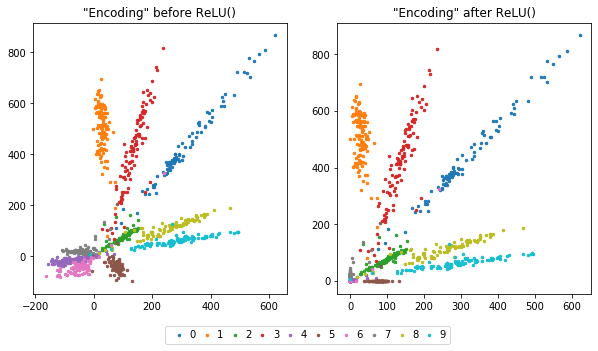

In [90]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
with torch.no_grad():
    model = baselineMLP
    x = X
    for i in range(len(baselineMLP.fc) - 3):
        x = baselineMLP.fc[i](x)
    mus = x.cpu().numpy()
    relu_mus = baselineMLP.fc[i+1](x).cpu().numpy()
    for label in labels:
        idxs = np.where(y==label)
        ax1.scatter(mus[idxs,0], mus[idxs,1], 
                   c=f'C{label}', s=6, label=label)
        ax2.scatter(relu_mus[idxs,0], relu_mus[idxs,1], 
                   c=f'C{label}', s=6)

ax1.set_title("\"Encoding\" before ReLU()")
ax2.set_title("\"Encoding\" after ReLU()")
ax1.legend(loc="lower left", bbox_to_anchor=(0.5,-0.2),
           ncol=len(labels), columnspacing=0.1, handletextpad=0.05)

plt.show()

Finalmente (y como extra) vemos que, como cabría de esperar, las "representaciones" obtenidas por la red MLP distan mucho de las obtenidas con los modelos estocásticos, al no encontrarse restringidas en cuanto a su distribución en el espacio más que por el requisito de que a la salida de la red se obtenga una buena precisión.

Resulta interesante además que a la salida de la capa de "*encoder*" se mantiene una relativamente buena distribución de los datos, en el sentido de que pareciera que no es muy difícil encontrar hiperplanos que separen una clase de otra en este espacio bidimensional (teniendo en cuenta como funciona una neurona de este tipo de modelos), al menos para los números 0,1,3,8,9, pareciendo los restantes un poco más difíciles de discernir debido a su traslape y cercanía.

No obstante, al aplicar la función de activación ReLU pareciera que se pierde un poco esta capacidad, ya que muchos datos se agrupan en el origen. Esto podría explicar por qué este modelo ofreció finalmente un desempeño algo peor que los estocásticos con una restricción relativamente pequeña.

In [91]:
X.cpu()
baselineMLP.cpu()
for beta in betas:
    DVIBResults[beta]['model'].cpu()
    
# baselineMLP.cuda()
# for beta in betas:
#     DVIBResults[beta]['model'].cuda()